<a href="https://colab.research.google.com/github/blackloop03/Lab0_RoshanAdhikari_CPSMA-3933/blob/main/Project_Assignments/LPAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming Assignment

## Redo a WeBWorK Question Using Python

Consider WW Set 03 Problem 3.  Using python, do the following:
1. Copy your problem here.
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function $P = 3x+2y$.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

#1.
Given the system of inequalities below, determine the shape of the feasible region and find the vertices of the feasible region. Give the shape as "triangle", "quadrilateral", or "unbounded". Report your vertices starting with the one which has the smallest x
-value. If more than one vertex has the same, smallest x
-value, start with the one that has the smallest y
-value. Proceed clockwise from the first vertex. Leave any unnecessary answer spaces blank.

x+y≥7

5x+y≤1

3x≥0y≥0

#Finding Corner points


We find where each boundary line intersects.
Boundary lines:

x + y = 7

5x + y = 13

x = 0

y = 0

In [1]:
import sympy as sp

x, y = sp.symbols('x y')

# Define the lines
eq1 = sp.Eq(x + y, 7)
eq2 = sp.Eq(5*x + y, 13)
eq3 = sp.Eq(x, 0)
eq4 = sp.Eq(y, 0)

# Find intersections
points = []
points.append(sp.solve((eq1, eq3), (x, y)))  # x=0 & x+y=7
points.append(sp.solve((eq2, eq3), (x, y)))  # x=0 & 5x+y=13
points.append(sp.solve((eq1, eq2), (x, y)))  # x+y=7 & 5x+y=13

points


[{x: 0, y: 7}, {x: 0, y: 13}, {x: 3/2, y: 11/2}]

#Graph the Feasible Region


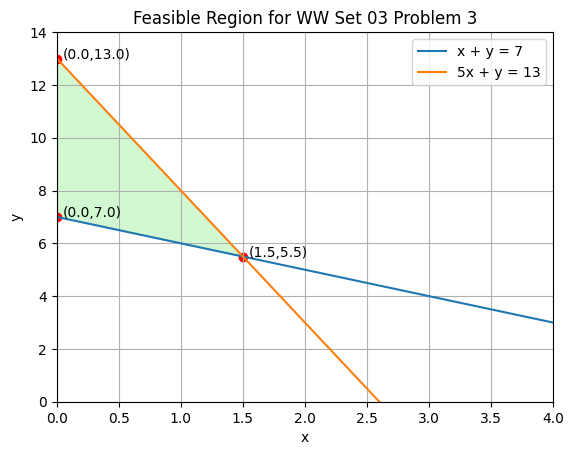

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 4, 200)
y1 = 7 - x_vals       # from x + y = 7
y2 = 13 - 5*x_vals    # from 5x + y = 13

plt.plot(x_vals, y1, label='x + y = 7')
plt.plot(x_vals, y2, label='5x + y = 13')

# Fill feasible region
plt.fill_between(x_vals, y1, y2, where=(y2>=y1)&(y2>=0), color='lightgreen', alpha=0.4)

# Corner points
points = np.array([[0,7],[0,13],[1.5,5.5]])
plt.scatter(points[:,0], points[:,1], color='red')
for (xv, yv) in points:
    plt.text(xv+0.05, yv, f"({xv},{yv})")

plt.xlim(0,4)
plt.ylim(0,14)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region for WW Set 03 Problem 3')
plt.legend()
plt.grid(True)
plt.show()


#Find Corner that Maximizes
P=3x+2y


In [3]:
points = [(0,7),(0,13),(1.5,5.5)]

def P(x, y):
    return 3*x + 2*y

for pt in points:
    print(pt, "=> P =", P(pt[0], pt[1]))


(0, 7) => P = 14
(0, 13) => P = 26
(1.5, 5.5) => P = 15.5


#Turn inequalities into equalities:


In [4]:
# Slack variables added conceptually:
# x + y - s1 = 7
# 5x + y + s2 = 13
# s1, s2 >= 0


#Solve Using a Built-in Linear Programming Solver


In [5]:
from scipy.optimize import linprog

# Objective: Maximize 3x + 2y → minimize -3x - 2y
c = [-3, -2]

# Constraints
A = [
    [-1, -1],   # x + y >= 7 → -x - y <= -7
    [5, 1]      # 5x + y <= 13
]
b = [-7, 13]

# Bounds for x, y
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds)

print("Optimal x, y:", res.x)
print("Maximum P:", -res.fun)


Optimal x, y: [ 0. 13.]
Maximum P: 26.0


## Redo a WeBWorK Question Using Python

Consider WW Set 04 Problem 6.  Using python, do the following:
1. Write the equations that describe the problem completely using $\LaTeX$ encoding.   
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

Here is an inline equation: $P = 288x + 180y$.

And here is a block equation:
$$
\begin{aligned}
\text{Maximize } \quad & P = 288x + 180y \\
\text{subject to } \quad
& 20x + 10y \le 630 \quad \text{(hours)} \\
& 78x + 65y \le 3003 \quad \text{(material)} \\
& x \ge 0, \; y \ge 0
\end{aligned}
$$



From the constraints:

$$
\begin{cases}
2x + y \le 63,\\
78x + 65y \le 3003,\\
x \ge 0,\\
y \ge 0
\end{cases}
$$

The first–quadrant intersections that satisfy all inequalities are:

$$
(0,0), \quad
(0,46.2)\ \text{(material line at } x = 0), \quad
(21,21)\ \text{(intersection of } 2x + y = 63\ \text{and } 78x + 65y = 3003), \quad
(31.5,0)\ \text{(hours line at } y = 0).
$$

If we order the vertices by increasing \(x\)-value and proceed clockwise, the feasible region corners are:

$$
(0,0)\ \rightarrow\ (0,46.2)\ \rightarrow\ (21,21)\ \rightarrow\ (31.5,0).
$$


In [7]:
import sympy as sp

# Define variables
x, y = sp.symbols('x y', real=True)

# Define constraint equalities
eq1 = sp.Eq(2*x + y, 63)       # hours
eq2 = sp.Eq(78*x + 65*y, 3003) # material
eq3 = sp.Eq(x, 0)               # x = 0 (axis)
eq4 = sp.Eq(y, 0)               # y = 0 (axis)

# List all equations
eqs = [eq1, eq2, eq3, eq4]

# Generate all pairwise intersections
points = []
for (a,b) in [(eqs[i], eqs[j]) for i in range(len(eqs)) for j in range(i+1, len(eqs))]:
    sol = sp.solve((a,b), (x,y))
    if sol:
        points.append(sol)

# Convert to numeric and check feasibility
feasible_points = []
for sol in points:
    xv, yv = float(sol[x]), float(sol[y])
    if xv >= 0 and yv >= 0 and (2*xv + yv <= 63) and (78*xv + 65*yv <= 3003):
        feasible_points.append((round(xv,3), round(yv,3)))

# Remove duplicates
feasible_points = list(set(feasible_points))
feasible_points


[(31.5, 0.0), (0.0, 46.2), (21.0, 21.0), (0.0, 0.0)]

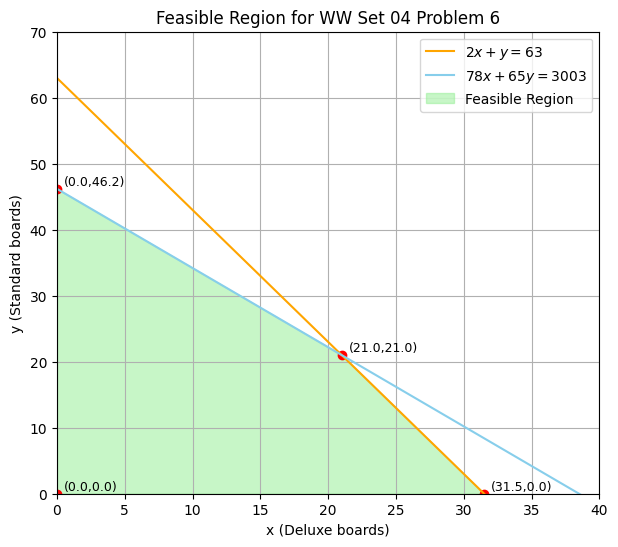

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraint functions
x = np.linspace(0, 40, 400)
y1 = 63 - 2*x               # from 2x + y = 63  (hours)
y2 = (3003 - 78*x) / 65     # from 78x + 65y = 3003  (material)

# Plot the lines
plt.figure(figsize=(7,6))
plt.plot(x, y1, label=r'$2x + y = 63$', color='orange')
plt.plot(x, y2, label=r'$78x + 65y = 3003$', color='skyblue')

# Fill feasible region
# The feasible region satisfies: y <= y1, y <= y2, y >= 0, x >= 0
y_feasible = np.minimum(y1, y2)
plt.fill_between(x, 0, y_feasible, where=(y_feasible>=0), color='lightgreen', alpha=0.5, label='Feasible Region')

# Corner points
corners = np.array([[0,0], [0,46.2], [21,21], [31.5,0]])
plt.scatter(corners[:,0], corners[:,1], color='red')

# Annotate points
for (xv, yv) in corners:
    plt.text(xv+0.5, yv+0.5, f"({xv},{yv})", fontsize=9)

# Axes limits
plt.xlim(0, 40)
plt.ylim(0, 70)

# Labels and title
plt.xlabel("x (Deluxe boards)")
plt.ylabel("y (Standard boards)")
plt.title("Feasible Region for WW Set 04 Problem 6")
plt.legend()
plt.grid(True)
plt.show()


#Introducing Slack Variables


In [9]:
import pandas as pd

points = [(0,0),(0,46.2),(21,21),(31.5,0)]
rows = []
for x,y in points:
    s1 = 63 - (2*x + y)
    s2 = 3003 - (78*x + 65*y)
    rows.append({"x":x, "y":y, "s1":round(s1,2), "s2":round(s2,2)})
pd.DataFrame(rows)


,x,y,s1,s2
0,0.0,0.0,63.0,3003.0
1,0.0,46.2,16.8,0.0
2,21.0,21.0,0.0,0.0
3,31.5,0.0,0.0,546.0


# Step 5 – Solve using a built-in Linear Programming Solver

In [10]:


import numpy as np
import pandas as pd
from scipy.optimize import linprog

# Objective: Maximize P = 288x + 180y  → minimize -P
c = [-288, -180]

# Constraints
# 20x + 10y <= 630  (production hours)
# 78x + 65y <= 3003 (material)
A = [
    [20, 10],
    [78, 65]
]
b = [630, 3003]

# Bounds for x and y
bounds = [(0, None), (0, None)]

# Solve using linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds)

# Extract optimal values
x_opt, y_opt = res.x
P_opt = -res.fun

print("Optimal solution from solver:")
print(f"x = {x_opt:.2f}")
print(f"y = {y_opt:.2f}")
print(f"Maximum P = {P_opt:.2f}")

# --- Compare with corner points ---
corners = [(0,0), (0,46.2), (21,21), (31.5,0)]

def P(x, y):
    return 288*x + 180*y

# Evaluate each corner
results = []
for (x, y) in corners:
    results.append({"Method":"Corner Point", "x":x, "y":y, "P":P(x, y)})

# Add solver result
results.append({"Method":"SciPy linprog", "x":x_opt, "y":y_opt, "P":P_opt})

df = pd.DataFrame(results)
print("\nComparison of Results:")
print(df.to_string(index=False))


Optimal solution from solver:
x = 21.00
y = 21.00
Maximum P = 9828.00

Comparison of Results:
       Method    x    y      P
 Corner Point  0.0  0.0    0.0
 Corner Point  0.0 46.2 8316.0
 Corner Point 21.0 21.0 9828.0
 Corner Point 31.5  0.0 9072.0
SciPy linprog 21.0 21.0 9828.0
